In [6]:
import pandas as pd
import os

# Define the directory path where the files are located
directory = 'data/5-labeled-sentiment/dataMaud/'

# Initialize an empty dictionary to store dataframes for each year
dataframes_per_year = {}

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Extract year and fuel type from the filename
        year, fuel_type = filename.split('_')[0], filename.split('_')[1].split('.')[0]
        print(year)
        print(fuel_type)
        
        # Load the CSV file into a dataframe
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Add a new column for fuel type
        df['Fuel_Type'] = fuel_type
        
        # Add the dataframe to the dictionary using year as key
        if year not in dataframes_per_year:
            dataframes_per_year[year] = df
        else:
            # If dataframe for the year already exists, merge them
            dataframes_per_year[year] = pd.concat([dataframes_per_year[year], df])

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes_per_year.values(), ignore_index=True)


1960s
coal
1960s
gas
1960s
oil
1970s
coal
1970s
gas
1970s
oil
1980s
coal
1980s
gas
1980s
oil
1990s
coal
1990s
gas
1990s
oil


In [16]:
dataframes_per_year['1990s']

,labels_edo,labels_marin,index_article,text_split,newspaper_title,labeler3,Fuel_Type
0,0,2,2411001,De uitworp van zwaveldioxide (SO2) door het ve...,De Telegraaf,1.0,coal
1,1,0,2355660,Op 31 maart 1980 kwam de laatste steenkolenwag...,Nieuwsblad van het Noorden,2.0,coal
2,0,1,2137250,naam opgebouwd. Mensen die het politieke syste...,Nieuwsblad van het Noorden,2.0,coal
3,0,1,247639,De ontsluiting van aardgasreserves in de Derde...,Nederlands dagblad : gereformeerd gezinsblad /...,1.0,coal
4,1,2,2120646,DEN HAAG (GPD) - Het ministerie van economisch...,NaN,0.0,coal
...,...,...,...,...,...,...,...
29,1,0,136948,De politieke discussie of in Netland nieuwe ke...,De Telegraaf,0.0,oil
30,0,1,2797424,Dit heeft de energie-deskundige prof dr. P. Od...,NaN,1.0,oil
31,0,1,2919069,Sinds pre-industriële tijd tot 1986 is de hoev...,Nieuwsblad van het Noorden,1.0,oil
32,0,1,2756314,In totaal onderzocht de inspectie 16 Gelderse ...,Limburgsch dagblad,1.0,oil


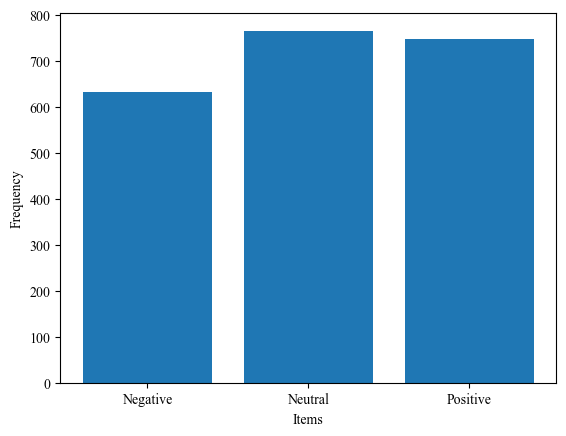

labeler3
1.0    765
2.0    747
0.0    632
Name: count, dtype: int64


In [33]:
import matplotlib.pyplot as plt

counts = combined_df['labeler3'].value_counts()

frequencies = {'Negative': counts[0],
               'Neutral': counts[1],
               'Positive': counts[2]}

# Create bar plot
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

plt.bar(frequencies.keys(), frequencies.values())

# Add labels and title
plt.xlabel('Items')
plt.ylabel('Frequency')

plt.grid(False)

# Show plot
plt.show()

print(counts)